In [1]:
import win32com.client
import pandas as pd
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Visum = win32com.client.Dispatch('Visum.Visum.18')

In [3]:
Visum.LoadVersion('D:/001_Projects/01 - GIPTN/04 - Macro Model/George3.ver')

In [78]:
disc = Visum.Net.Matrices.ItemByKey(3).GetValues()
c = Visum.Net.Matrices.ItemByKey(439).GetValues()
b = Visum.Net.Matrices.ItemByKey(440).GetValues()
w = Visum.Net.Matrices.ItemByKey(442).GetValues()
p = Visum.Net.Matrices.ItemByKey(443).GetValues()

In [79]:
disc = list(itertools.chain(disc))
c = list(itertools.chain(c))
b = list(itertools.chain(b))
w = list(itertools.chain(w))
p = list(itertools.chain(p))

In [80]:
disc2 = [item for t in disc for item in t] 
c2 = [item for t in c for item in t] 
b2 = [item for t in b for item in t] 
w2 = [item for t in w for item in t] 
p2 = [item for t in p for item in t] 

In [114]:
df = pd.DataFrame([disc2, c2, b2, w2, p2]).transpose()
df.columns = ['disc', 'c', 'b', 'w', 'p']
df = df.loc[(df.disc <= 1000)]
df['total'] = df.c + df.b + df.w + df.p
df['totdis'] = df.disc * df.total
df['totdisc'] = df.disc * df.c
df['totdisb'] = df.disc * df.b
df['totdisw'] = df.disc * df.w
df['totdisp'] = df.disc * df.p

summary = {}
summary = {'average distance' : df['totdis'].sum() / df['total'].sum(), 
           'average distance car' : df['totdisc'].sum() / df['c'].sum(), 
           'average distance cycle' : df['totdisb'].sum() / df['b'].sum(), 
           'average distance pedestrian' : df['totdisw'].sum() / df['w'].sum(), 
           'average distance transit' : df['totdisp'].sum() / df['p'].sum(), 
           'mode % car' : df['c'].sum() / df['total'].sum()*100, 
           'mode % cycle' : df['b'].sum() / df['total'].sum()*100, 
           'mode % pedestrian' : df['w'].sum() / df['total'].sum()*100, 
           'mode % transit' : df['p'].sum() / df['total'].sum()*100}

df['disc'] = pd.cut(df.disc,bins=range(0, 45, 1))
df = df.groupby(['disc']).sum().reset_index()
df = df[['disc', 'c', 'b', 'w', 'p']]


In [115]:
summary

{'average distance': 4.439585572073629,
 'average distance car': 5.220971146442182,
 'average distance cycle': 5.774552365735901,
 'average distance pedestrian': 3.056105316103955,
 'average distance transit': 5.190725834209674,
 'mode % car': 35.68400720854458,
 'mode % cycle': 3.1869612952935324,
 'mode % pedestrian': 36.5657183796487,
 'mode % transit': 24.563313116513168}

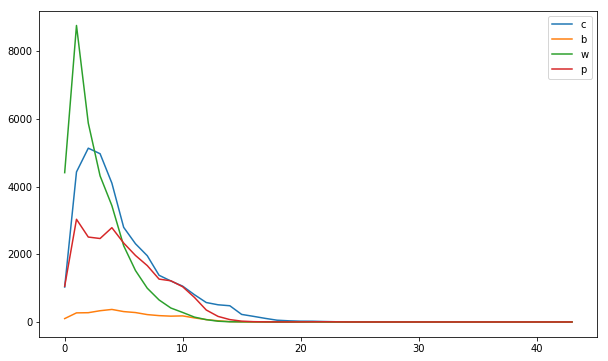

In [113]:
ax = df.plot(figsize=(10,6))

In [121]:
df.to_csv('D:\\001_Projects\\01 - GIPTN\\04 - Macro Model\\TLD2.csv')

In [111]:
df

,disc,c,b,w,p
0,"(0, 1]",1032.996851,1.000888e+02,4.412503e+03,1055.845622
1,"(1, 2]",4433.388091,2.688948e+02,8.761702e+03,3034.492945
2,"(2, 3]",5135.670460,2.741299e+02,5.876691e+03,2509.545526
3,"(3, 4]",4971.876350,3.323588e+02,4.316822e+03,2466.261967
4,"(4, 5]",4102.360679,3.706135e+02,3.437835e+03,2786.247723
5,"(5, 6]",2796.441340,3.070110e+02,2.252425e+03,2332.836580
6,"(6, 7]",2311.388603,2.783257e+02,1.520566e+03,1965.442053
7,"(7, 8]",1957.380223,2.181284e+02,9.979726e+02,1665.999138
8,"(8, 9]",1379.712899,1.875271e+02,6.508173e+02,1266.633004
9,"(9, 10]",1211.013406,1.720619e+02,4.124215e+02,1217.089165
